# Analysis Habit reading  with [Pocket](https://getpocket.com/)

![](unnamed.jpg)

How I'm in the top 1% of readers on [@Pocket for 2018!](https://getpocket.com/stats/2018/d0ad36b5ca) I have decided to analyze my pocket data to try to understand my reading habits.

In this Jupyter Notebook, we are going to cover all ETL process and the data analysis process in a low level of complexity and low data volume, although in some cases, we are going to call analysis methods the middle level like language detect or text analysis.

But before we start writing code, we should ask ourselves, what are we looking for? Or what do we want to find in the analysis? The best way to do this is to ask preliminary questions about the data we want to answer, such as

- How many articles I’ve added to my Pocket till date?
- How many articles have I read / I need to read?
- How large is the gap between added and read articles?
- What topics do I add articles about?

To try answer this question, we will follow the next steps.

0. Import Libraries
1. ***Extract***.Set and get data from the pocket API with [Request]()<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.Get a consumer_key <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2.Get a request token <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.3.Authenticate<br/> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.4.Generate an access_token <br/> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.5.Get Data <br/> 
2. ***Transform and Load*** data with [Pandas]() <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1.Detect the type of python object from the obtained <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.Transform the data to a useful Pandas Dataframe <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3.Pre-analyze the columns of your data frame <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.4.Debug your data frame <br/>
3. ***Data Analysis and Vizualization*** with [Pandas]()[Matplotlib]()[wordcloud]()[detectlanguage]() <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.Numerical Analysis <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.Text analysis with []() <br/>



finally, before starting with the notebook it's important to note that although the complexity level is low all the principles of data analysis are practice ins this exercise. , this means that with this knowledge you can try to analyze more complex  scenarios 

***0.*** Import necessary libraries

In [1]:
import requests # to make http requests in this case for pocket api

# data transfromation and analysis
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json 
from collections import OrderedDict
from datetime import datetime
# text analysis
from wordcloud import WordCloud, STOPWORDS 
#import detectlanguage #Api

#Data visualizacion and plot
import matplotlib.pyplot as plt
# parametros de visualizaciones
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

%matplotlib inline  

##  1. Extract. Set and get data from the pocket API

**1.1 Get a consumer_key** create a new [Pocket application](https://getpocket.com/developer/apps/new) <br/>
**1.2 Get a request token** Now go to your python code and paste the consumer_key in the requests.post() function. The response of requests.post() will be stored in pocket_api variable. Check if the response is correct by executing pocket_api.status_code – if the response is 200, then the connection was successfully made. If not, try to understand the error reason using pocket_api.headers[‘X-Error’] command. Finally, execute pocket_api.text to get your request_token.<br/>
**1.3 Authenticate** Now use the request_token obtained above and authenticate in your browser. Replace text after "?request_token=" with the request_token generated above and paste the link below in the browser and authenticate.<br/> 
-https://getpocket.com/auth/authorize?request_token=PASTE-YOUR-REQUEST-TOKEN-HERE&amp;amp;amp;amp;amp;amp;amp;amp;amp;redirect_uri=https://getpocket.com/connected_application<br/>

**1.4 Generate an access_token** Use your consumer_key and request_token generated earlier to call requests.post() again and check for status_code. If 200, then execute pocket_auth.text and you’ll finally get your access_token. <br/>

**1.5. Get data from the API** Use the Consumer Key and access token to do the request according tp wih the API documentation 




In [3]:
# 1.2 Get a request token
# pocket_api variable stores the http response
pocket_api = requests.post('https://getpocket.com/v3/oauth/request',
                           data = {'consumer_key':'PUT HERE YOUR CONSUMER KEY OBTAINED FROM POCKET',
                                   'redirect_uri':'https://google.com'})

# Test Status If equal to 200 is ok the other way check error reason
    # print(pocket_api.status_code) 
    # print(pocket_api.headers['X-Error'])

# Here is your request_token stored -pocket_api.text-

#1.3 Authenticate 

# Modify and paste the link below in the browser and authenticate Replace text after "?request_token=" with the request_token generated above 
#https://getpocket.com/auth/authorize?request_token=PASTE-YOUR-REQUEST-TOKEN-HERE&amp;amp;amp;amp;amp;amp;amp;amp;amp;redirect_uri=https://getpocket.com/connected_application

#1.4 Generate an access_token
pocket_auth = requests.post('https://getpocket.com/v3/oauth/authorize',
                            data = {'consumer_key':'PUT HERE YOUR CONSUMER KEY OBTAINED FROM POCKET',
                                    'code':'51947cf3-8998-32b6-e129-26e865'})
# Check the response: if 200, then it means all OK
# pocket_auth.status_code
 
# Check error reason, if any
# print(pocket_auth.headers['X-Error'])

# We're done authenticating,this is your access token -pocket_auth.text-


# 1.5 Get data from the API

# Reference: https://getpocket.com/developer/docs/v3/retrieve
pocket_add = requests.post('https://getpocket.com/v3/get',
                           data= {'consumer_key':'82710-efa2906be95b400ce9fad6f8',#private
                                  'access_token':'81159e5f-c60a-dadd-0b50-1b1c40',#private
                                  'state':'all',
                                  'detailType':'simple'})
 
# Check the response: if 200, then it means all OK
# pocket_add.status_code
 
#pocket_add.text


## 2.Transform data

***2.1.*** Detect the type of python object from the obtained<br>
***2.2.*** Transform from respuest reponse object to pd.df <br>
***2.3.*** Pre-analyze the columns of your data frame <br>
***2.4.*** Clean and transform your data frame

In [4]:
#2.1
# print(type(pocket_add))

# 2.2
texto=pocket_add.text
json_data = json.loads(texto)
df= pd.DataFrame.from_dict(json_data['list']).T

#2.3

print(df.dtypes)
df.notnull().apply(pd.Series.value_counts)


amp_url                     object
domain_metadata             object
excerpt                     object
favorite                    object
given_title                 object
given_url                   object
has_image                   object
has_video                   object
is_article                  object
is_index                    object
item_id                     object
lang                        object
listen_duration_estimate    object
resolved_id                 object
resolved_title              object
resolved_url                object
sort_id                     object
status                      object
time_added                  object
time_favorited              object
time_read                   object
time_to_read                object
time_updated                object
top_image_url               object
word_count                  object
dtype: object


,amp_url,domain_metadata,excerpt,favorite,given_title,given_url,has_image,has_video,is_article,is_index,...,resolved_url,sort_id,status,time_added,time_favorited,time_read,time_to_read,time_updated,top_image_url,word_count
False,2314,1859,4,NaN,NaN,NaN,4,4,4,4,...,4,NaN,NaN,NaN,NaN,NaN,1270,NaN,1207,4
True,340,795,2650,2654.0,2654.0,2654.0,2650,2650,2650,2650,...,2650,2654.0,2654.0,2654.0,2654.0,2654.0,1384,2654.0,1447,2650


In [5]:
# 2.4 Clean up the dataset
available = df.notnull()
mask= available['word_count']&available['time_to_read']
df = df[mask]


df.dtypes
df[['status','favorite','word_count','time_to_read']] = df[['status','favorite','word_count','time_to_read']].astype(int)
df['time_added'] = pd.to_datetime(df['time_added'],unit='s')
df['time_read'] = pd.to_datetime(df['time_read'],unit='s')

# Check the data types
#df.dtypes#

In [8]:
#Feature Time
df['mes']=df.time_read.dt.month
df['dia_sem']=df.time_read.dt.dayofweek
df['hora']=df.time_read.dt.hour
df['pag']=df['word_count']/320

In [10]:
df.columns

Index(['amp_url', 'domain_metadata', 'excerpt', 'favorite', 'given_title',
       'given_url', 'has_image', 'has_video', 'is_article', 'is_index',
       'item_id', 'lang', 'listen_duration_estimate', 'resolved_id',
       'resolved_title', 'resolved_url', 'sort_id', 'status', 'time_added',
       'time_favorited', 'time_read', 'time_to_read', 'time_updated',
       'top_image_url', 'word_count', 'mes', 'dia_sem', 'hora', 'pag'],
      dtype='object')

# 3. Data Analysis
## 3.1.Numerical Analysis
As the achievement of belonging to 1% of readers in pocket is based on data 2018 it is necessary to filter the data to analyze only this information.

In [5]:
# filter Time
start_date ='01-01-2018'
end_date = '31-12-2018'
mask_2 = (df['time_read'] > start_date) & (df['time_read'] <= end_date)
df_2018= df[mask_2]


In [2]:
#Borrar
df_2018=pd.read_csv('pocket_2018.csv')

start_date ='01-01-2018'
end_date = '31-12-2018'
mask_2 = (df_2018['time_read'] > start_date) & (df_2018['time_read'] <= end_date)
df_2018= df_2018[mask_2]

df_2018['time_read'] = pd.to_datetime(df_2018['time_read'])
df_2018['time_added'] = pd.to_datetime(df_2018['time_added'])
df_2018['mes']=df_2018.time_read.dt.month
df_2018['dia_sem']=df_2018.time_read.dt.dayofweek
df_2018['hora']=df_2018.time_read.dt.hour
df_2018['pag']=df_2018['word_count']/320


In [21]:
# How many items are there in my Pocket?
print('How many items are in my pocket added in 2018? R\{}'.format(df_2018['item_id'].count()))
 
# What % of articles are read?
print('What % of articles was reading in 2018? R\{}'.format((df_2018['status'].sum()*100)/df_2018['item_id'].count()))


How many items are in my pocket added in 2018? R\824
What % of articles was reading in 2018? R\100.0


In [22]:
# How long is the average article in my Pocket? (minutes)
df_2018['time_to_read'].describe()

count    824.000000
mean       8.115291
std        9.846578
min        3.000000
25%        4.000000
50%        6.000000
75%        9.000000
max      155.000000
Name: time_to_read, dtype: float64

In [14]:
# How long is the average article in my Pocket? (word count)
df_2018['pag'].describe()

count    824.000000
mean       5.555992
std        6.773979
min        1.718750
25%        2.648438
50%        3.943750
75%        6.375000
max      106.865625
Name: pag, dtype: float64

In [15]:
# How many words have I read till date?
print('How many words have I read in 2018? R/{}'.format(df_2018.loc[df_2018['status'] == 1, 'word_count'].sum()))                                                                     
# How many books is this equivalent to?
print('How many books is this equivalent to? R/{}'.format(df_2018.loc[df_2018['status'] == 1, 'word_count'].sum()/64000))
# How many pages is this equivalent to?
print('How many pages is this equivalent to? R/{}'.format(df_2018.loc[df_2018['status'] == 1, 'word_count'].sum()/320))


How many words have I read in 2018? R/1465004
How many books is this equivalent to? R/22.8906875
How many pages is this equivalent to? R/4578.1375


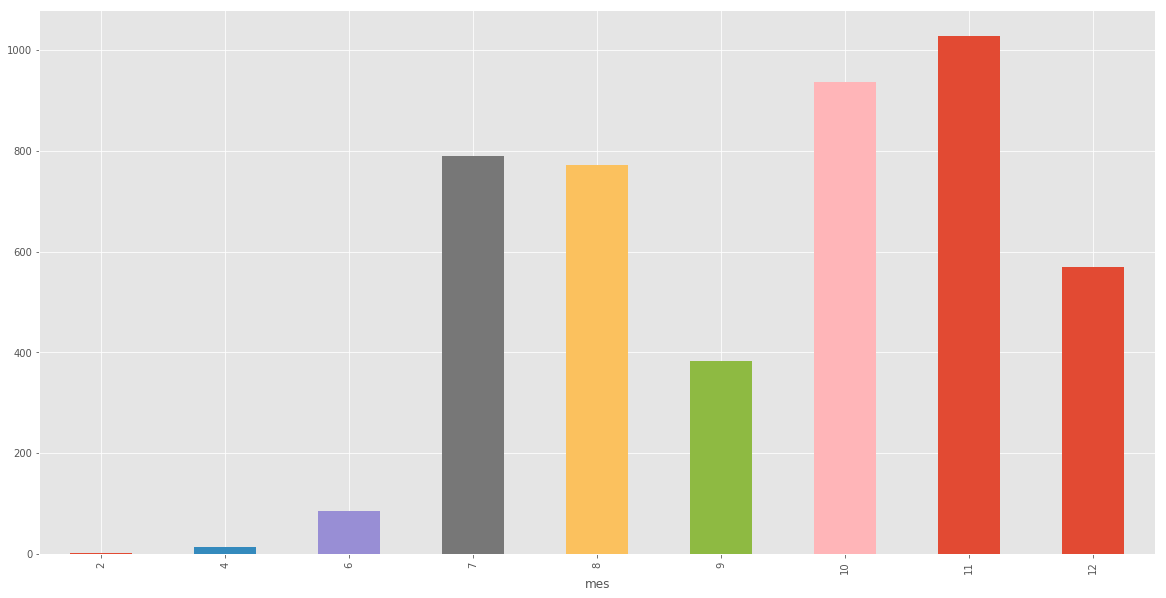

In [24]:
#
plot_read = df_2018.groupby('mes')['pag'].sum()
plt.figure(figsize=(20,10))
plot_read.plot.bar()
fig.savefig(".png", dpi=900)

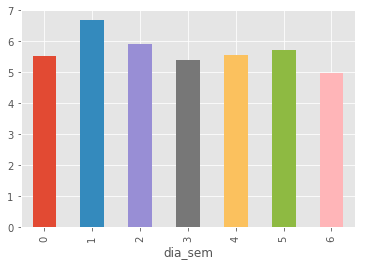

In [16]:
what is the mean number of pages read by  week day
plot_read = df_2018.groupby('dia_sem')['pag'].mean()
plot_read.plot.bar()

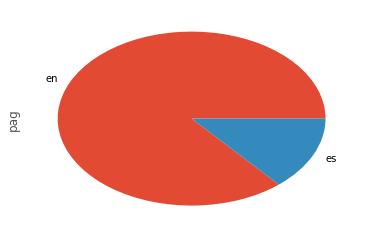

In [17]:
# what is the participation by language
plot_read = df_2018.groupby('lang')['pag'].sum()
plot_read.plot.pie()

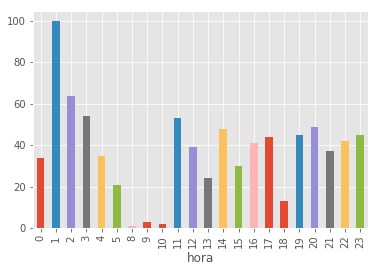

In [72]:
#horas
plot_read = df_2018.groupby('hora')['item_id'].count()
plot_read.plot.bar()

## 3.2. Text Analysis

Part of the analysis I'm going to do is supported by an API that detects the language, because developing and training the algorithm necessary to detect the language is out of reach and would greatly extend the article

We have to do some transformation more to can use teh API

In [17]:
#prepare data to text analysis again tranformation reindexing
df_2018 = df_2018.reset_index()
texto = df_2018['excerpt'].tolist()


In [18]:
detectlanguage.configuration.api_key = "3a6545f3c5a180ff549ddf334d2ec8ec"
detectlanguage.user_status()    

{'date': '2019-02-02',
 'requests': 0,
 'bytes': 0,
 'plan': 'FREE',
 'plan_expires': None,
 'daily_requests_limit': 1000,
 'daily_bytes_limit': 1048576,
 'status': 'ACTIVE'}

In [19]:
language_analysis = detectlanguage.detect(texto)


In [20]:
# get the language field from the list return and add to the dataframe 

lista = []

for listItem in language_analysis:
    for item in listItem :
        lista.append(item.get('language'))
           
            
language_column= pd.Series(lista)           

df_2018['Language']= language_column


In [3]:
df_2018_En =df_2018[df_2018['lang']=='en'] 
df_2018_Es =df_2018[df_2018['lang']=='es']


In [7]:
meses = list(df_2018_En.groupby('mes')['mes'].count().index)

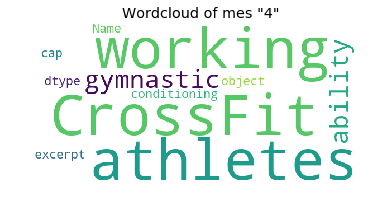

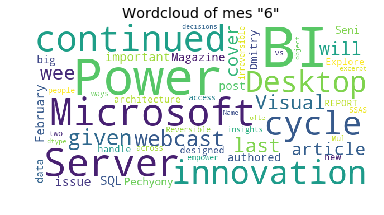

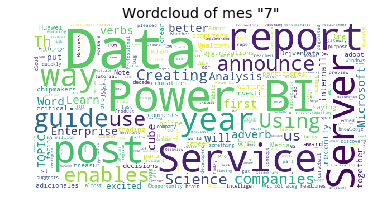

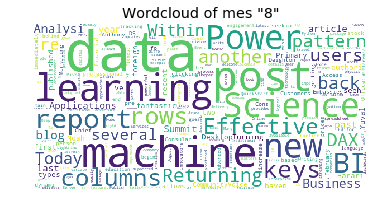

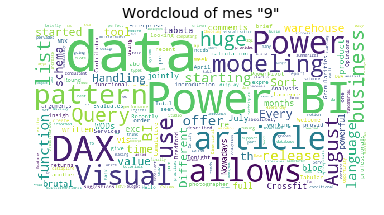

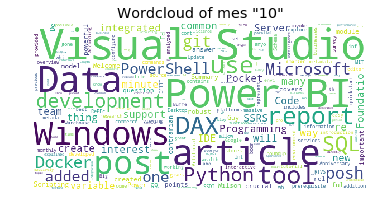

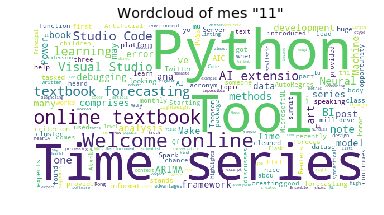

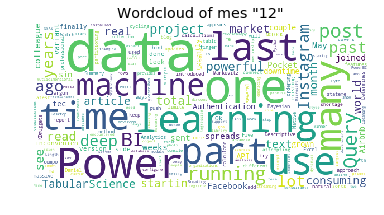

In [20]:
stopwords_en = set(STOPWORDS)
def nube_mes(mes):
    nube =   WordCloud(background_color='white',
                         width=600,
                         height=300,
                         stopwords=stopwords_en,
                         max_words=500,
                         max_font_size=100, 
                         random_state=42).generate(str(df_2018_En['excerpt'][df_2018_En['mes']== m]))
    plt.imshow(nube)
    plt.axis('off')
    plt.title('Wordcloud of mes "{}"'.format(mes))
    plt.show()
    plt.close()
    plt.savefig("Pocket Wordcloud en.png", dpi=900)
    
    
for m in meses:
    nube_mes(m)   